In [ ]:
!pip install torch torchvision torchaudio matplotlib numpy tqdm

In [20]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torchvision.transforms import v2

import os
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [21]:
for path_dir, dir_list, file_list in os.walk('./mnist/training'): # os.walk is GENERATOR func
            print(f'[os => walk]: {path_dir} | {len(dir_list)} | {len(file_list)}')

[os => walk]: ./mnist/training | 10 | 0
[os => walk]: ./mnist/training/class_4 | 0 | 5842
[os => walk]: ./mnist/training/class_3 | 0 | 6131
[os => walk]: ./mnist/training/class_2 | 0 | 5958
[os => walk]: ./mnist/training/class_5 | 0 | 5421
[os => walk]: ./mnist/training/class_9 | 0 | 5949
[os => walk]: ./mnist/training/class_0 | 0 | 5923
[os => walk]: ./mnist/training/class_7 | 0 | 6265
[os => walk]: ./mnist/training/class_6 | 0 | 5918
[os => walk]: ./mnist/training/class_1 | 0 | 6742
[os => walk]: ./mnist/training/class_8 | 0 | 5851


In [22]:
transform_v2 = v2.Compose([
    v2.ToImage(),
    v2.Grayscale(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5, ), std=(0.5, ))
])

train_data = ImageFolder('./mnist/training', transform=transform_v2)
test_data = ImageFolder('./mnist/testing', transform=transform_v2)

In [23]:
img, cls = train_data[9000]

print(f'''
        img: 
            {type(img)}
            {img.shape}
            {img.dtype}
            min = {img.min()}, max = {img.max()}
         
        cls:
            {cls}
''')


        img: 
            <class 'torchvision.tv_tensors._image.Image'>
            torch.Size([1, 28, 28])
            torch.float32
            min = -1.0, max = 0.992156982421875
         
        cls:
            1



In [24]:
train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [25]:
train_data.class_to_idx

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

In [26]:
print(f'Train data length: {len(train_data)}')
print(f'Testing data length: {len(test_data)}')

Train data length: 60000
Testing data length: 10000


class_2


TypeError: Invalid shape (1, 28, 28) for image data

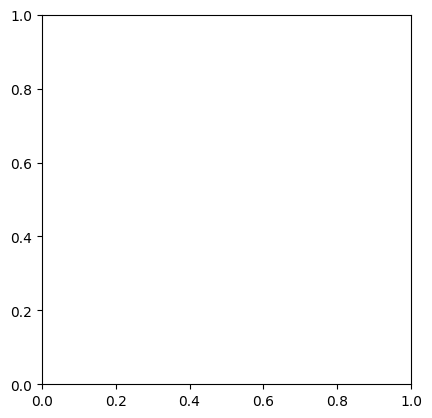

In [27]:
img, one_hot_vec_position = train_data[15000]
cls = train_data.classes[one_hot_vec_position]
print(f'\033[32m{cls}\033[0m')
plt.imshow(img, cmap='Greys')

In [28]:
train_data_split, val_data = random_split(train_data, [0.8, 0.2])
print(f'[Train]: {len(train_data_split)}')
print(f'[Validation]: {len(val_data)}')
print(f'[Testing]: {len(test_data)}')

[Train]: 48000
[Validation]: 12000
[Testing]: 10000


In [29]:
train_loader = DataLoader(dataset=train_data_split, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)